In [6]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import scipy.stats as stats


In [7]:
data = pd.DataFrame.from_csv("/Users/raphaelpresberg/Desktop/Stevens/BIA 652 Multivariate Data Analysis/Project/NYC_taxis.csv")

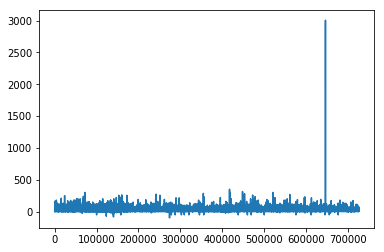

In [17]:
#data understanding
data.head()
data.tail(10)
sLength = len(data['Pickup Time'])
data['Trip time'] = pd.Series(np.random.randn(sLength), index = data.index)


#Normal Probability plot for payment fare
#payment fare is a numpy array of the pandas column
payment_fare = data.as_matrix(columns=data.columns[13:14])
payment_fare_total = data.as_matrix(columns = data.columns[18:19])

#mean cost of a trip without @ without taxes
np.mean(payment_fare)
np.mean(payment_fare_total)

#median cost of a trip without @ without taxes
np.median(payment_fare)
np.median(payment_fare_total)

#The numpy.ptp() function returns the range (maximum-minimum) of values along an axis.
np.ptp(payment_fare)
np.ptp(payment_fare_total)

#standard deviation & variance
np.std(payment_fare)
np.std(payment_fare_total)

np.var(payment_fare)
np.var(payment_fare_total)

plt.plot(payment_fare)
plt.show()


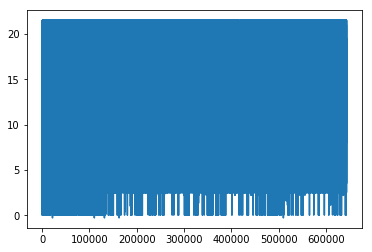

In [19]:
#removing outliers for the normal prob plot

def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

good_payment_fare = np.array(removeOutliers(payment_fare,1))
good_payment_fare_total = removeOutliers(payment_fare_total,1)




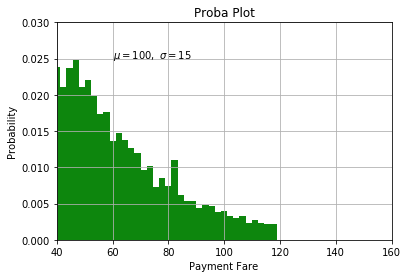

In [10]:
# Probability plot for payment fare
mu = np.mean(good_payment_fare)
sigma = np.std(good_payment_fare)

mu, sigma = mu, sigma
x = mu + sigma * np.array(good_payment_fare_total)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


plt.xlabel('Payment Fare')
plt.ylabel('Probability')
plt.title('Proba Plot')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

array([[ 10. ],
       [  7.5],
       [ 13.5],
       ..., 
       [  9. ],
       [ 12.5],
       [ 52. ]])

In [28]:
#a = pickup time
#b = dropoff time
a = data.as_matrix(columns=data.columns[0:1])
b = data.as_matrix(columns=data.columns[2:3])



array([['0:00:00.000'],
       ['0:00:00.000'],
       ['0:00:00.000'],
       ..., 
       ['23:59:59.000'],
       ['23:59:59.000'],
       ['23:59:59.000']], dtype=object)

In [16]:
type(data.columns[1])


str

In [23]:
#if (drop off date = pickup date):
#    Dropoff Time - Pickup Time
#else: 
#    abs_value =abs(DT - PT)
#    1440 - abs_value

data


,Pickup Time,Dropoff Date,Dropoff Time,Vendor ID,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,Store and Forward Flag,Dropoff Longitude,Dropoff Latitude,Payment Type,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time
Pickup Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,1,1.68,-73.991547,40.750069,1,N,0.000000,0.000000,CSH,10.0,0.0,0.5,0.00,0.00,10.80,-0.581132
2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,3,1.56,-74.001320,40.729057,1,N,-74.010208,40.719662,CRD,7.5,0.5,0.5,0.00,0.00,8.80,-1.161232
2015-01-01,0:00:00.000,20150101,0:11:26.000,CMT,5,4.00,-73.971436,40.760201,1,N,-73.921181,40.768269,CSH,13.5,0.5,0.5,0.00,0.00,14.50,0.601061
2015-01-01,0:00:01.000,20150101,0:03:49.000,CMT,1,0.80,-73.860847,40.757294,1,N,-73.868111,40.752285,CSH,5.0,0.5,0.5,0.00,0.00,6.30,-0.282180
2015-01-01,0:00:03.000,20150101,0:10:50.000,VTS,1,1.58,-73.987579,40.765270,1,N,-73.976921,40.776970,CRD,9.0,0.5,0.5,1.90,0.00,12.20,-0.376464
2015-01-01,0:00:03.000,20150101,0:21:48.000,VTS,2,2.57,-73.969017,40.754269,1,N,-73.994133,40.761600,CSH,14.5,0.5,0.5,0.00,0.00,15.80,0.149722
2015-01-01,0:00:04.000,20150101,0:10:44.000,CMT,3,2.50,-73.957008,40.774502,1,N,-73.966019,40.800617,CSH,10.5,0.5,0.5,0.00,0.00,11.80,0.596983
2015-01-01,0:00:05.000,20150101,0:10:52.000,VTS,2,1.30,-73.950500,40.769863,1,N,-73.950943,40.769825,CRD,8.5,0.5,0.5,2.00,0.00,11.80,-0.149977
2015-01-01,0:00:06.000,20150101,0:00:48.000,CMT,2,0.00,-73.985367,40.710770,1,N,-73.984772,40.710682,NOC,2.5,0.5,0.5,0.00,0.00,3.80,-0.397189
